# scratch work

In [7]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.jplhorizons import Horizons

from jorbit import Particle

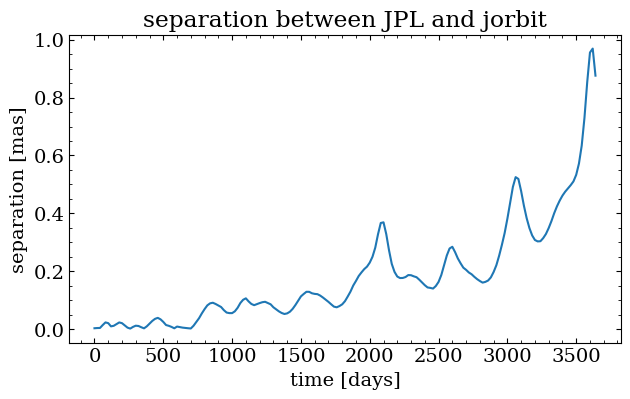

In [13]:
t0 = Time("2024-12-01 00:00")
timespan_tdb = {"start": t0.tdb.iso, "stop": (t0 + 10 * u.year).tdb.iso, "step": "20d"}
timespan_utc = {"start": t0.utc.iso, "stop": (t0 + 10 * u.year).utc.iso, "step": "20d"}

obj = Horizons(id="274301", location="500@0", epochs=timespan_tdb)
vecs = obj.vectors(refplane="earth")
true_xs = jnp.array([vecs["x"], vecs["y"], vecs["z"]]).T
true_vs = jnp.array([vecs["vx"], vecs["vy"], vecs["vz"]]).T

# p = Particle(x=true_xs[0], v=true_vs[0], time=t0, gravity="newtonian planets")
p = Particle(x=true_xs[0], v=true_vs[0], time=t0, gravity="default solar system")

times = Time(jnp.array(vecs["datetime_jd"]), format="jd", scale="tdb")
jorbit_ephem = p.ephemeris(times, "kitt peak")


obj = Horizons(id="274301", location="695@399", epochs=timespan_utc)
pts = obj.ephemerides(extra_precision=True, quantities="1")
true_coords = SkyCoord(pts["RA"], pts["DEC"], unit=(u.deg, u.deg))

err = true_coords.separation(jorbit_ephem).to(u.mas).value

fig, ax = plt.subplots()
ax.plot(times.utc.jd - times.utc.jd[0], err)
ax.set(
    xlabel="time [days]",
    ylabel="separation [mas]",
    title="separation between Horizons and jorbit",
);

In [2]:
t0 = Time("2024-12-01 00:00")

obj = Horizons(
    id="274301",
    location="500@0",
    epochs={"start": t0.tdb.iso, "stop": (t0 + 4 * u.day).tdb.iso, "step": "1d"},
)
vecs = obj.vectors(refplane="earth")
true_xs = jnp.array([vecs["x"], vecs["y"], vecs["z"]]).T
true_vs = jnp.array([vecs["vx"], vecs["vy"], vecs["vz"]]).T

p = Particle(x=true_xs[0], v=true_vs[0], time=t0, gravity="newtonian planets")

In [3]:
p.ephemeris(Time(jnp.array(vecs["datetime_jd"]), format="jd", scale="tdb"), "kitt peak")

<SkyCoord (ICRS): (ra, dec) in deg
    [(152.01007338, 5.09857717), (152.14802198, 5.02762957),
     (152.28103845, 4.95839468), (152.40905961, 4.89091452),
     (152.53202384, 4.82523051)]>

In [4]:
obj = Horizons(
    id="274301",
    location="695@399",
    epochs={"start": t0.utc.iso, "stop": (t0 + 4 * u.day).utc.iso, "step": "1d"},
)
pts = obj.ephemerides(extra_precision=True, quantities="1")
true_coords = SkyCoord(pts["RA"], pts["DEC"], unit=(u.deg, u.deg))
true_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(152.01007338, 5.09857717), (152.14802198, 5.02762957),
     (152.28103845, 4.95839468), (152.40905961, 4.89091452),
     (152.53202384, 4.82523051)]>

In [5]:
true_coords.separation(
    p.ephemeris(
        Time(jnp.array(vecs["datetime_jd"]), format="jd", scale="tdb"), "kitt peak"
    )
)

<Angle [7.81542671e-10, 7.64335373e-10, 1.01567219e-09, 2.69671547e-10,
        8.92700618e-10] deg>